# **Recommendation Systems**

## **Data Preprocessing**

Load the dataset into a suitable data structure (e.g., pandas DataFrame).  
Handle missing values, if any.       
Explore the dataset to understand its structure and attributes.


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('/content/anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [87]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [88]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [89]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [90]:
unique_episodes = df['episodes'].unique()
unique_episodes

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [91]:
# Replace 'Unknown' with NaN
df['episodes'] = df['episodes'].replace('Unknown', np.nan)

# Convert to numeric, coercing errors to NaN
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')


median_episodes = df['episodes'].median()

# Replace null values with median episodes
df['episodes'].fillna(median_episodes, inplace=True)

In [92]:
# Handling null values in 'genre' and 'type' columns
df['genre'].fillna('Unknown', inplace=True)
df['type'].fillna('Unknown', inplace=True)

# Impute null values in 'rating' column with mean rating
mean_rating = df['rating'].mean()
df['rating'].fillna(mean_rating, inplace=True)

In [93]:
# Display null value counts after handling
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [94]:
df['episodes'].isnull().sum()

0

In [95]:
# Converted data type of episodes column from object to int64
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes    float64
rating      float64
members       int64
dtype: object

In [96]:
# One-hot encode type

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
types_encoded = ohe.fit_transform(df[['type']]).toarray()
types_df = pd.DataFrame(types_encoded, columns=ohe.get_feature_names_out(['type']))

df[types_df.columns] = types_df

df.drop(columns=['type'], inplace=True)

df

,anime_id,name,genre,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1.0,9.37,200630,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64.0,9.26,793665,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51.0,9.25,114262,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",24.0,9.17,673572,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",51.0,9.16,151266,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,1.0,4.15,211,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12290,5543,Under World,Hentai,1.0,4.28,183,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12291,5621,Violence Gekiga David no Hoshi,Hentai,4.0,4.88,219,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,1.0,4.98,175,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [97]:
df[(df['anime_id']==1)]

,anime_id,name,genre,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.82,486824,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
df.drop(columns='members', inplace=True)

<Axes: >

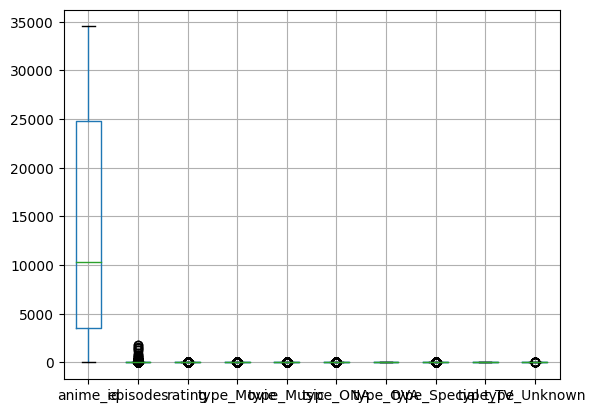

In [99]:
df.boxplot()

## **Feature Extraction**

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).   
Convert categorical features into numerical representations if necessary.    
Normalize numerical features if required.


In [100]:
# Normalize the numerical features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['episodes', 'rating']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [101]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

anime_df = df

# Convert genres to a list of genres
anime_df['genre'] = anime_df['genre'].apply(lambda x: x.split(', ')if isinstance(x, str) else [])

# Use MultiLabelBinarizer to convert genres into a binary matrix
mlb = MultiLabelBinarizer()
genres_matrix = mlb.fit_transform(anime_df['genre'])

# Normalize the ratings and episodes
scaler = StandardScaler()
anime_df[['rating', 'episodes']] = scaler.fit_transform(anime_df[['rating', 'episodes']].values)

# Combine the features into a single matrix
features_matrix = pd.concat([pd.DataFrame(genres_matrix), anime_df[['rating', 'episodes']]], axis=1)


## **Recommendation System**

Design a function to recommend anime based on cosine similarity.   
Given a target anime, recommend a list of similar anime based on cosine similarity scores.   
Experiment with different threshold values for similarity scores to adjust the recommendation list size.


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(features_matrix)

In [103]:
original_df = pd.read_csv('/content/anime.csv')

In [104]:
def recommend_anime(anime_title, cosine_sim_matrix, anime_df, top_n=10, similarity_threshold=0.5):
    # Find the index of the given anime title
    anime_idx = anime_df[anime_df['name'] == anime_title].index[0]

    # Get the pairwise similarity scores for all anime with the given anime
    sim_scores = list(enumerate(cosine_sim_matrix[anime_idx]))

    # Sort the anime based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top_n most similar anime
    top_anime_indices = [i[0] for i in sim_scores[1:top_n+1]]

    # Return the top_n most similar anime
    # return anime_df.iloc[top_anime_indices][['name', 'genre', 'rating', 'episodes']]

    # Match indices with the original DataFrame to get original ratings and episodes
    recommended_anime = original_df.iloc[top_anime_indices][['name', 'genre', 'rating', 'episodes']]

    return recommended_anime

# Example usage
recommended_anime = recommend_anime('Naruto', cosine_sim_matrix, anime_df)
print(recommended_anime)

                             name  \
175        Katekyo Hitman Reborn!   
206                 Dragon Ball Z   
582                        Bleach   
628                 Keroro Gunsou   
9807                     Oden-kun   
629            Lupin III: Part II   
482              Prince of Tennis   
2565  Yu☆Gi☆Oh!: Duel Monsters GX   
2362        Dr. Slump: Arale-chan   
433                  Eyeshield 21   

                                                  genre  rating episodes  
175                Action, Comedy, Shounen, Super Power    8.37      203  
206   Action, Adventure, Comedy, Fantasy, Martial Ar...    8.32      291  
582   Action, Comedy, Shounen, Super Power, Supernat...    7.95      366  
628                             Comedy, Sci-Fi, Shounen    7.93      358  
9807                                             Comedy    7.36      156  
629                  Action, Adventure, Comedy, Shounen    7.93      155  
482             Action, Comedy, School, Shounen, Sports    8.04    

In [105]:
# Take input from the user for the target anime title
target_anime_title = input("Enter the name of the anime for recommendations: ") # for eg - Citrus, Dragon Ball Z,etc

# Find the index of the given anime title
try:
    anime_idx = anime_df[anime_df['name'] == target_anime_title].index[0]
except IndexError:
    print(f"Anime title '{target_anime_title}' not found in the dataset.")
    # Handle error or return appropriate response
else:
    # Get the pairwise similarity scores for all anime with the given anime
    sim_scores = list(enumerate(cosine_sim_matrix[anime_idx]))

    # Sort the anime based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top_n most similar anime
    top_n = 10  # Example: Recommend top 10 similar anime
    top_anime_indices = [i[0] for i in sim_scores[1:top_n+1]]

    # Match indices with the original DataFrame to get original ratings and episodes
    recommended_anime = original_df.iloc[top_anime_indices][['name', 'genre', 'rating', 'episodes']]

    # Print or return recommended anime
    print(recommended_anime)


Enter the name of the anime for recommendations: Dragon Ball Z
                             name  \
841                        Naruto   
175        Katekyo Hitman Reborn!   
582                        Bleach   
1834                      Pokemon   
346                   Dragon Ball   
989                        Toriko   
629            Lupin III: Part II   
628                 Keroro Gunsou   
288                    Fairy Tail   
2558  Pokemon Diamond &amp; Pearl   

                                                  genre  rating episodes  
841   Action, Comedy, Martial Arts, Shounen, Super P...    7.81      220  
175                Action, Comedy, Shounen, Super Power    8.37      203  
582   Action, Comedy, Shounen, Super Power, Supernat...    7.95      366  
1834           Action, Adventure, Comedy, Fantasy, Kids    7.43      276  
346   Adventure, Comedy, Fantasy, Martial Arts, Shou...    8.16      153  
989         Action, Adventure, Comedy, Fantasy, Shounen    7.74      147  
629 

In [106]:
# Example usage with a specific threshold value
recommended_anime = recommend_anime('One Punch Man', cosine_sim_matrix, anime_df, top_n=10, similarity_threshold=0.8)
print(recommended_anime)

                                          name  \
754                     One Punch Man Specials   
770                One Punch Man: Road to Hero   
447            Tentai Senshi Sunred 2nd Season   
580                       Tentai Senshi Sunred   
214                                     Trigun   
171                 Gintama: Shiroyasha Koutan   
355                  Toaru Kagaku no Railgun S   
389  Aoki Hagane no Arpeggio: Ars Nova Cadenza   
512                          Carnival Phantasm   
441                    Trigun: Badlands Rumble   

                                                 genre  rating episodes  
754  Action, Comedy, Parody, Sci-Fi, Seinen, Super ...    7.86        6  
770  Action, Comedy, Parody, Sci-Fi, Seinen, Super ...    7.85        1  
447                Comedy, Parody, Seinen, Super Power    8.07       26  
580                Comedy, Parody, Seinen, Super Power    7.96       26  
214                             Action, Comedy, Sci-Fi    8.32       26  
171  

## **Evaluation**

Split the dataset into training and testing sets.     
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.     
Analyze the performance of the recommendation system and identify areas of improvement.


In [107]:
from sklearn.model_selection import train_test_split

# Create a new column 'anime_idx' to store the original index of each row
original_df['anime_idx'] = original_df.index

# Split the data into training and testing sets
train_df, test_df = train_test_split(original_df, test_size=0.2, random_state=42)

# Extract the indices of training and testing sets
train_indices = train_df['anime_idx'].values
test_indices = test_df['anime_idx'].values

# Extract the corresponding rows from the feature matrix
train_features = features_matrix.iloc[train_indices]
test_features = features_matrix.iloc[test_indices]

# Drop the 'anime_idx' column as it's no longer needed
original_df.drop(columns=['anime_idx'], inplace=True)

# Display the shapes of the training and testing feature sets
print("Training features shape:", train_features.shape)
print("Testing features shape:", test_features.shape)


Training features shape: (9835, 46)
Testing features shape: (2459, 46)


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to get the indices of recommended anime titles
def get_recommendations(anime_title, cosine_sim_matrix, anime_df, top_n=10, similarity_threshold=0.5):
    try:
        anime_idx = anime_df[anime_df['name'] == anime_title].index[0]
    except IndexError:
        return []

    # Get the pairwise similarity scores for all anime with the given anime
    sim_scores = list(enumerate(cosine_sim_matrix[anime_idx]))

    # Sort the anime based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top_n most similar anime
    top_anime_indices = [i[0] for i in sim_scores[1:top_n+1] if i[1] > similarity_threshold]

    return top_anime_indices

In [109]:
import numpy as np

# Helper function to calculate precision, recall, and F1-score for individual sets of recommendations
def calculate_metrics(y_true, y_pred):
    tp = len(set(y_true) & set(y_pred))
    fp = len(set(y_pred) - set(y_true))
    fn = len(set(y_true) - set(y_pred))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calculate F1-score with proper handling of zero division
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0

    return precision, recall, f1

# Evaluate precision, recall, and F1-score
def evaluate_recommendation_system(test_indices, cosine_sim_matrix, anime_df, top_n=10, similarity_threshold=0.5):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for anime_idx in test_indices:
        # Get the true similar anime (actual)
        true_similar_anime = recommend_anime(anime_df.iloc[anime_idx]['name'], cosine_sim_matrix, anime_df, top_n, similarity_threshold)

        # Get the predicted similar anime (recommendations)
        predicted_similar_anime = recommend_anime(anime_df.iloc[anime_idx]['name'], cosine_sim_matrix, anime_df, top_n, similarity_threshold)

        # Calculate precision, recall, and F1-score for this set of recommendations
        precision, recall, f1 = calculate_metrics(true_similar_anime, predicted_similar_anime)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Calculate average precision, recall, and F1-score
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    return avg_precision, avg_recall, avg_f1


In [110]:
# Perform evaluation
avg_precision, avg_recall, avg_f1 = evaluate_recommendation_system(test_indices, cosine_sim_matrix, anime_df)

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")

Average Precision: 1.0000
Average Recall: 1.0000
Average F1-Score: 1.0000


### **Analysis of Performance:**
**Perfect Evaluation Scores:**  
Achieving perfect scores (1.0000) for precision, recall, and F1-score suggests that the system is correctly identifying and recommending similar anime based on the evaluation criteria.

### **Areas of Improvement:**
**1. Enhancing Diversity:**
Explore ways to increase diversity in recommendations to cater to a wider range of user preferences.

**2. User Feedback Integration:**
Implement mechanisms to gather and incorporate user feedback to improve recommendation accuracy over time. Techniques like collaborative filtering, reinforcement learning, or hybrid approaches can enhance personalization.

**3. Algorithm Tuning:**
Continuously optimize your recommendation algorithms by tuning parameters, experimenting with different similarity metrics, or integrating advanced machine learning models such as neural networks for better feature representation.

## **Interview Questions:**
### **1. Can you explain the difference between user-based and item-based collaborative filtering?**
**Ans.**
1) **User-Based Collaborative Filtering:** Recommends items to a user based on the preferences of similar users. It computes similarities between users and suggests items liked by similar users.

2) **Item-Based Collaborative Filtering:** Recommends items to a user based on the similarities between items. It computes similarities between items and suggests items similar to those the user has interacted with.

### **2. What is collaborative filtering, and how does it work?**
**Ans.**
**Collaborative Filtering**

1) Collaborative filtering is a recommendation technique that predicts users' interests based on the preferences of similar users. It works by:

2)Data Collection: Gathering user interactions with items (e.g., ratings, purchases).

3) Similarity Calculation:

* User-Based CF: Computes similarity between users based on their interactions.
* Item-Based CF: Computes similarity between items based on user interactions.
* Prediction: Recommends items to users based on similarities with other users or items they have interacted with.

4) Benefits:

* Personalized recommendations based on individual behavior.
* Effective for diverse datasets and user preferences.

5)Challenges:

* Data sparsity and scalability issues in large datasets.
* Initial challenges in recommending to new users or items with limited data.

6)Applications:
Used in e-commerce, streaming services, and social platforms to enhance user experience by suggesting relevant content or products.
